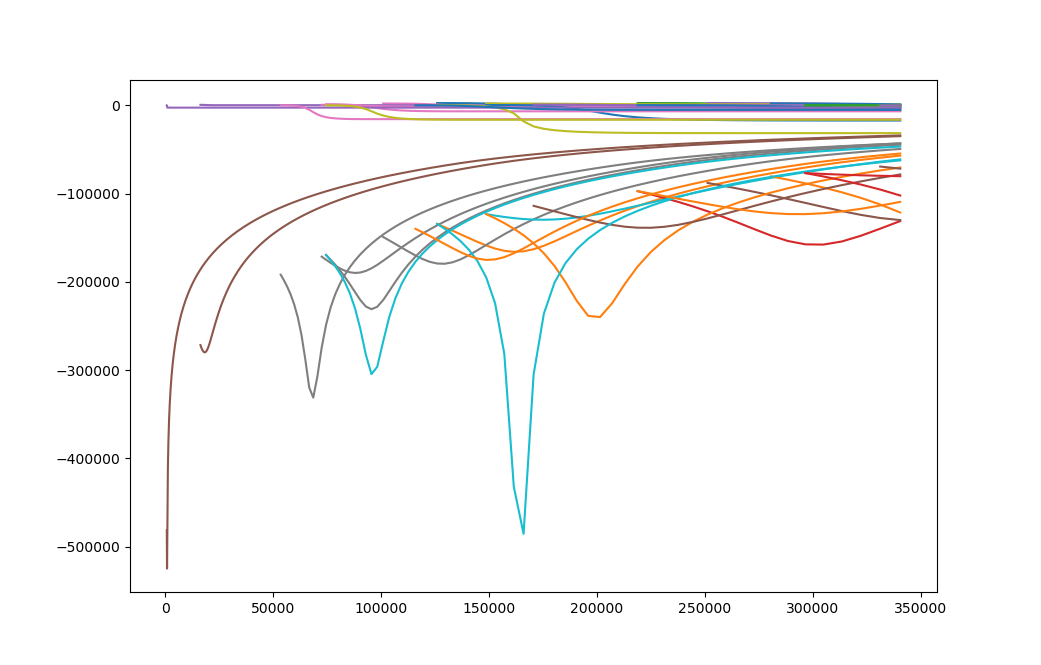

In [93]:
%matplotlib widget

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
c_s = math.sqrt(script_R*T)
M = 1.989*10.0**30 ## kg 
G = 6.674*10.0**(-11)  ## m^3*kg^-1*s^-2
a = 0.975471932310942752606143078377

plt.clf()
for file in os.listdir('.'):
    if file.endswith('.csv'):
        dat = pd.read_csv(f'{file}')
        mask = lambda p: dat['particle'] == p
        for p in dat['particle'].unique():
            #plt.yscale('symlog')
            #plt.xscale('log')
            #plt.axvline(x=2e15, ymin = -1e7, ymax = -1e4)
            plt.plot(dat['time'][mask(p)], dat['energy'][mask(p)])
            plt.plot(dat['time'][mask(p)], dat['potential'][mask(p)])

plt.show()

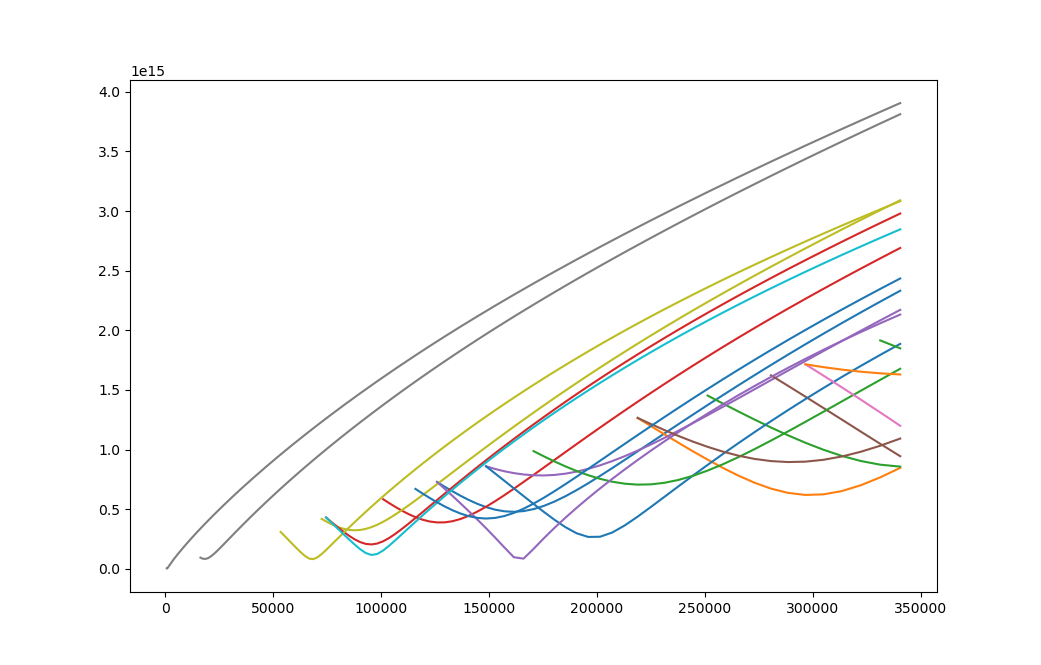

In [92]:
plt.clf()
for file in os.listdir('.'):
    if file.endswith('.csv'):
        dat = pd.read_csv(f'{file}')
        mask = lambda p: dat['particle'] == p
        for p in dat['particle'].unique():
            #plt.yscale('symlog')
            #plt.xscale('log')
            #plt.axvline(x=2e15, ymin = -1e7, ymax = -1e4)
            plt.plot(dat['time'][mask(p)], dat['r'][mask(p)])

plt.show()

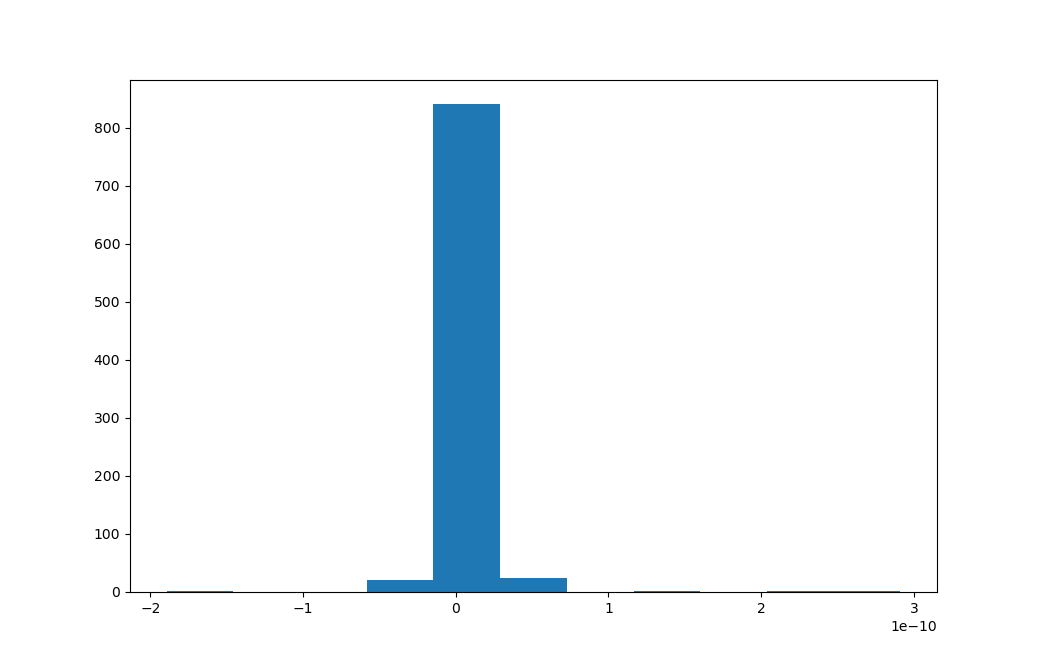

"\nfig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))\nax3.plot(dat['time'], [r/(c_s*years_to_seconds(t)) for r, t in zip(dat['r'], dat['time'])], label=r'x')\nax1.plot(dat['time'], dat['r'], label=r'$r$')\nax2.plot(dat['time'], dat['potential'], label = r'$\x0barphi$')\nax2.plot(dat['time'], philocal, label = r'$\x0barphi_{local}$')\nax1.legend()\nax2.legend()\nax3.legend()\nplt.show()\n"

In [82]:
v_integral = np.loadtxt('shuInt.txt')
v_x = np.logspace(-12, np.log10(2), 10000)
IntHelper = scipy.interpolate.interp1d(v_x, v_integral, kind = 'cubic')

plt.clf()

def years_to_seconds(years):
    seconds = years * 31557600
    return seconds

def trapIntegrateLog(f, xmin, xmax, N):
    s = np.logspace(np.log10(xmin), np.log10(xmax), N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def trapIntegrateLinear(f, xmin, xmax, N):
    s = np.linspace(xmin, xmax, N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def get_x_integral(x):
    if x < 10.0**(-12):
        return 0
    if x > 2:
        return IntHelper(2) + 2*(x-2)
    return IntHelper(x)

def Mtot(r, t):
    r0 = c_s*t
    centralMass = .975502*c_s**2*r0/G
    Mcalc =  centralMass + r0**3/(G*t**2)*get_x_integral(r/r0)
    return min(Mcalc, M)

def getPhi(r, t):
    rmax = (G*M)/(2*c_s**2)
    phi_max = -G*M/rmax
    r_meters = r
    if r >= rmax:
        return -G*M/r_meters
    else:
        return phi_max - G*trapIntegrateLog(lambda rp: (Mtot(rp, t))/rp**2, r_meters, rmax, 10000)

errtotals = []
for file in os.listdir('.'):
    if file.endswith('.csv'):
        dat = pd.read_csv(f'{file}')
        mask = lambda p: dat['particle'] == p
        for p in dat['particle'].unique():
            dat = pd.read_csv(f'{file}')
            #philocal = [getPhi(r, years_to_seconds(t)) for r, t in zip(dat['r'], dat['time'])]
            err = np.array([getPhi(r, years_to_seconds(t)) for r, t in zip(dat['r'][mask(p)], dat['time'][mask(p)])])-dat['potential'][mask(p)]
            errtotals.append(err)

error = np.concatenate(errtotals)
plt.hist(error, bins='auto')
plt.show()

'''
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
ax3.plot(dat['time'], [r/(c_s*years_to_seconds(t)) for r, t in zip(dat['r'], dat['time'])], label=r'x')
ax1.plot(dat['time'], dat['r'], label=r'$r$')
ax2.plot(dat['time'], dat['potential'], label = r'$\varphi$')
ax2.plot(dat['time'], philocal, label = r'$\varphi_{local}$')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()
'''